## 평균의 비교
- 일반적으로 t-test를 사용함. 
- t-test의 종류
  + one sample t-test
  + student t-test
  + welch's test
  + paired sample t-test 
- t-test의 효과 표준 척도 Cohen's D
- 만약 t-test의 가정이 위배된다면, 



## The one-sample z-test
- 가장 쓸모없는 test 중 하나인 z-test
- 이 test의 유일한 용도는 통계를 가르칠 때 가장 많이 사용되는 도구
- 전제 조건
  + 모집단의 평균과 표준편차를 알아야 함
  + 왜 현실에서는 쓸모가 없냐면, 현실적으로 모집단의 평균과 표준편차를 알 방법은 존재하지 않는다.
- 무엇을 검정하는가?
  + 추출된 표본이 동일 모집단에 속하는지 가설 검증
- 가설검정
  + 귀무가설 : 표본 평균이 모집단의 평균과 같음
  + 대립가설 : 표본 평균이 모집단의 평균과 같지 않음

## 예제
- 모집단의 평균과 표준편차를 알고 있다. 
  + 평균 : 67.5
  + 표준편차 : 9.5
- 20명 심리학 학생 점수 추출
  + 20명의 평균은 67.5와 같은가? 다른가? 

### 시각화
- 평균이 67.5이고, 표준편차가 9.5인 그래프를 그려본다. 
- 이 때 모집단의 수는 100개를 의미한다. 
- 히스토그램이 의미하는 것은 20개의 샘플을 추출한다. 
  + 추출된 각각의 데이터는 50~89 사이에서만 나오게 된다. 

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [5]:
df['grades'].min(), df['grades'].max()

(50, 89)

### 가설 세우기
- 귀무가설 : 추출된 20개의 샘플의 평균은 67.5이다. 
- 대립가설 : 추출된 20개의 샘플의 평균은 67.5이 아니다. 


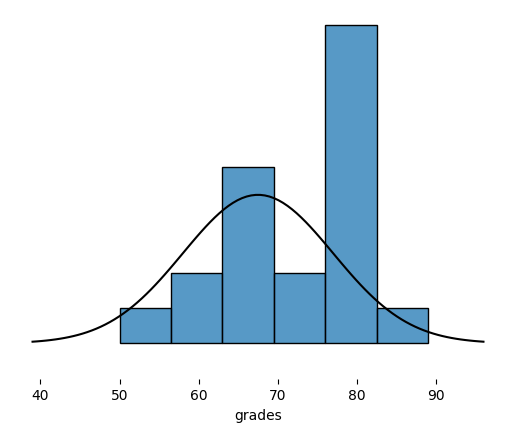

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5
sigma = 9.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

### 데이터 불러오기

In [7]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


### 샘플의 평균 구하기

In [8]:
import statistics
statistics.mean(df['grades'])

72.3

- 모집단의 평균은 67.5이고, 추출된 샘플의 평균은 72.3이다. 
  + 모집단의 평균과 20개의 추출된 평균은 다르다고 볼 수 있는가?
  + 우연히 샘플링 에러로 72.3이 나온 것인가?

- 결정을 어떻게 내릴 수 있는가? 

### 전제조건
- 샘플은 정규분포를 이루고 있다. 
- 모집단의 표준편차 9.5이다. 
- `stats.norm.pdf(x, mu, sigma)`는 함수는 주어진 값 x에서 정규(가우스) 분포의 확률 밀도 함수(PDF)를 계산하며, 평균은 mu이고 표준 편차는 sigma이다. 
  + 정규 분포는 통계학에서 키, 몸무게 또는 IQ 점수와 같이 정규 분포로 나타나는 실제 현상을 모델링하기 위해 자주 사용되는 연속 확률 분포입니다. 
  + pdf 함수는 평균과 표준편차가 주어졌을 때 무작위 변수가 특정 값 x를 취할 확률을 반환한다.
  + 정규 분포의 확률 밀도 함수는 종 모양의 곡선이며, 곡선의 정점은 평균값 mu에 있다.
  + 표준 편차 시그마는 곡선의 확산 또는 폭을 결정한다. 
  + 요약하면, stats.norm.pdf(x, mu, sigma)는 평균 mu와 표준 편차 시그마가 주어질 때 특정 값 x에서 정규 분포의 확률 밀도를 계산한다.

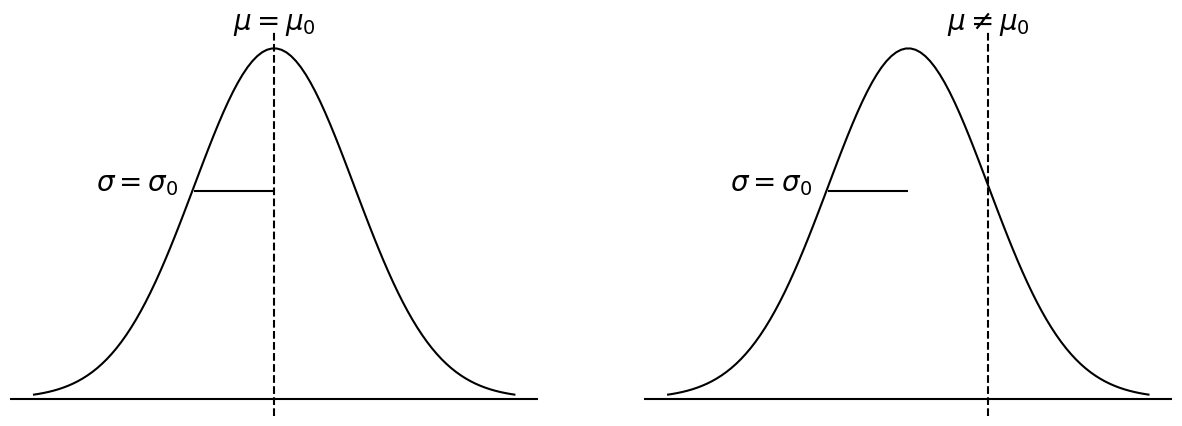

In [9]:
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=x,y=y, color='black', ax=axes[0])
sns.lineplot(x=x,y=y, color='black', ax=axes[1])

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)

axes[0].axhline(y=0, color='black')
axes[0].axvline(x=mu, color='black', linestyle='--')

axes[1].axhline(y=0, color='black')
axes[1].axvline(x=mu + sigma, color='black', linestyle='--')

axes[0].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')
axes[1].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')


axes[0].text(mu,42, r'$\mu = \mu_0$', size=20, ha="center")
axes[1].text(mu + sigma, 42, r'$\mu \neq \mu_0$', size=20, ha="center")

axes[0].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")
axes[1].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")

plt.show()

- 위 그림이 의미하는 것이 바로 두가지 전제조건을 말한다. 
- 양쪽 그림 모두 분포는 동일하다. 
- 표준편차도 동일하다. 
- 다만, 모집단의 평균과 추출된 샘플링된 평균은 같으냐? 다르냐?

### z-score
- 각 데이터 값이 평균으로부터 얼마나 떨어져 있는지를 나타내는 통계적인 예측값
  + 표준화된 수치(Standardized Score)

In [10]:
grades = df['grades']
sample_mean = statistics.mean(grades)
sample_mean
sd_true = 9.5
mu_null = 67.5
N = len(grades)

In [11]:
# 평균의 표준오차 구하기
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

In [12]:
# z_score 구하기
z_score = (sample_mean - mu_null) / sem_true
z_score

2.259605535157681

- 위 통계량이 의미하는 것은 무엇인가? 
- 이 때아래 그래프가 필요하다. 

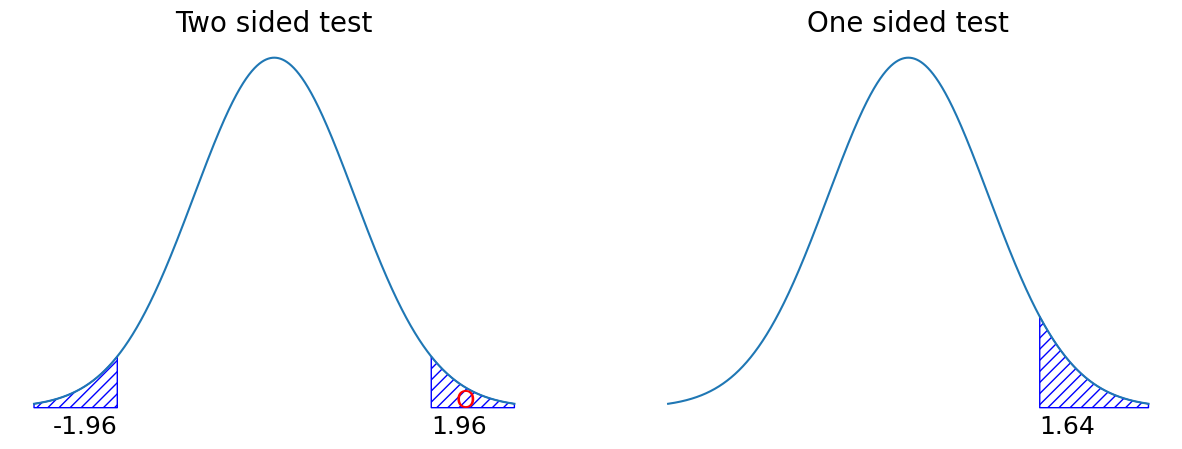

In [13]:
mu = 0
sigma = 1

x = np.arange(-3,3,0.001)
y = stats.norm.pdf(x, mu, sigma)


fig, (ax0, ax1) = plt.subplots(1, 2, sharey = True, figsize=(15, 5))


# Two-sided test
crit = 1.96
p_lower = x[x<crit*-1]
p_upper = x[x>crit]

ax0.plot(x, y)
ax0.fill_between(p_lower, 0, stats.norm.pdf(p_lower, mu, sigma),color="none",hatch="///",edgecolor="b")
ax0.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")
ax0.set_title("Two sided test", size = 20)
ax0.text(-1.96,-.03, '-1.96', size=18, ha="right")
ax0.text(1.96,-.03, '1.96', size=18, ha="left")
ax0.text(z_score, 0, 'O', size=18, ha="left", color = 'red')

# One-sided test
crit = 1.64
p_upper = x[x>crit]

ax1.plot(x, y)
ax1.set_title("One sided test", size = 20)
ax1.text(1.64,-.03, '1.64', size=18, ha="left")
ax1.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")

ax0.set_frame_on(False)
ax1.set_frame_on(False)

ax0.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

plt.show()

- 

- z-score가 의미하는 것은 위 분포에서 어디에 속하는지 표현해주는 것이다. 
- 그런데, p-value를 구하려면 어떻게 해야 할까?
- 아래 코드에서 NormalDist().cdf(-z_score) 설명은 아래와 같다. 
  + NormalDist() 기본적으로 평균이 0이고 표준편차가 1인 정규 분포 개체를 만든다. 
  + .cdf()는 확률 변수 X가 주어진 값보다 작거나 같을 확률을 알려준다. 
  + .cdf() 메서드는 주어진 값에서 정규 분포의 누적 분포 함수(CDF)를 계산하는 데 사용되는데. 이 경우 입력 값은 -z_score이다.
  + z_score가 음수이면 x가 평균보다 낮고, z_score가 양수이면 x가 평균보다 높다고 볼 수 있다. 

In [14]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939753

## 결론 및 정리
- p-value가 0.02라는 값은, 귀무가설을 기각하고, 대립가설을 채택해야 한다는 것을 의미한다. 


### 2가지 가정 of Z-test
- 정규성(Normality). z 검정에서는 실제 모집단 분포가 정규 분포라고 가정합니다.
- 모집단 표준편차 알고있다 : 모집단의 실제 표준 편차를 연구자가 알고 있다고 가정한다. 그런데, 말이 안되는 것이 표준편차를 알면서 평균에 대해서는 모른다는 것은 말이 안된다. 
